In [1]:
import os
import pandas as pd
import numpy as np
import cx_Oracle
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix,accuracy_score, classification_report, plot_roc_curve, plot_precision_recall_curve,roc_auc_score
from joblib import dump, load

os.chdir('D:/SOCOFAR')
import pipeline_bm as pipeline
pd.set_option('display.max_row', 1000000)
os.chdir('D:/SOCOFAR/Modelo_AA')

pipeline_bm = pipeline.clase_pipeline()

# **PRE-PROCESAMIENTO**

In [7]:
pipeline_bm.recibe_data(
    tipo = 'query',
    server = 'ORACLE',
    dataset_o_query = 'SELECT * FROM AA_MODELAR_2022_V2',
    target = 'TARGET', 
    #muestra = 'MUESTRA',
    #ano_mes = 'FECHA_VENTA',
    rut = 'RUT_CLIENTE', 
    excluir=[],
    categoricas = ['GENERO','GSE','PIRAMIDE','ACTIVIDAD','MACRO_GRAL','MACRO_BYCP','MACRO_FARMA','MACRO_WELLNESS','COMUNA','MES']
)

Procesando...
________________________________________________________________________________________________________________________
Datos recibidos: OK.
Número de filas y columnas del dataset: (130000, 417)
________________________________________________________________________________________________________________________


In [8]:
pipeline_bm.inicializar()
pipeline_bm.imputacion_nulos(imputar_0=['MONTO','FREQ','TRX','PROD_DIS','DSCTO','DCTO','NVISITAS','RECENCIA','NPROD','TICKET','PROP','MESES_INSCRITOS'])
#pipeline_bm.categoriza_continuas_nulos(corte_nulos=0.05, cuantiles_inicio=5)
#pipeline_bm.imputacion_nulos(estadistico_o_metodo='knn', n_vecinos=5)
pipeline_bm.Woeizar2(ruta_exporta='D:/SOCOFAR/Modelo_AA/clf_woe_aa.joblib')
#pipeline_bm.aplicar_log()
#pipeline_bm.feature_scaling(metodo='estandar')
#pipeline_bm.dumifica(botar_primera_col=True)

Variables fueron imputadas por medias: OK.
________________________________________________________________________________________________________________________
Woeizado de Variables: OK.
________________________________________________________________________________________________________________________


# **ENTRENAMIENTO DE MODELOS**

LOGISTIC REGRESSION

In [29]:
pipeline_bm.separa_muestras(test=0.3)
pipeline_bm.modelacion('LogisticRegression', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Separacion de muestras: OK.
________________________________________________________________________________________________________________________
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.795, total=  26.1s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s remaining:    0.0s


[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.798, total=  25.9s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.9s remaining:    0.0s


[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.801, total=  25.9s
[CV] C=1, class_weight=None, penalty=l2, random_state=0, solver=saga .
[CV]  C=1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.795, total=  25.8s
[CV] C=1, class_weight=None, penalty=l2, random_state=0, solver=saga .
[CV]  C=1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.797, total=  26.0s
[CV] C=1, class_weight=None, penalty=l2, random_state=0, solver=saga .
[CV]  C=1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.800, total=  25.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.6min finished


best params: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}
best estimator: LogisticRegression(C=0.1, random_state=0, solver='saga')
ROC: 0.7955261917335797
Modelación: OK.
________________________________________________________________________________________________________________________


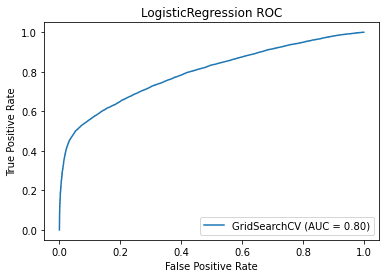

In [30]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [32]:
pipeline_bm.metricas_modelo_optimo(metrica='roc')
pipeline_bm.confusion_matrix

"ROC OPTIMO"

sens+espc:  1.461248937357538
KS:  0.4612489373575379
threshold optimo:  0.485
sensibility:  0.5977673565093282
specificity:  0.8634815808482097
precision:  0.8159048215403882
negative predictive value:  0.6795793235067202
Critical Success Index:  0.5267247574559828
accuracy:  0.7298205128205129
f1score:  0.6900061781059693
BalancedAccuracy:  0.730624468678769


TARGET,0,1
pred,,
0,16736,7891
1,2646,11727


*DECISION TREE*

In [9]:
pipeline_bm.modelacion('DecisionTree', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class_weight=None, criterion=gini, max_depth=15, min_samples_leaf=1, random_state=0, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=None, criterion=gini, max_depth=15, min_samples_leaf=1, random_state=0, splitter=best, score=0.408, total=   2.3s
[CV] class_weight=None, criterion=gini, max_depth=15, min_samples_leaf=1, random_state=0, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  class_weight=None, criterion=gini, max_depth=15, min_samples_leaf=1, random_state=0, splitter=best, score=0.426, total=   2.3s
[CV] class_weight=None, criterion=gini, max_depth=15, min_samples_leaf=1, random_state=0, splitter=best 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  class_weight=None, criterion=gini, max_depth=15, min_samples_leaf=1, random_state=0, splitter=best, score=0.500, total=   2.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished


best params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'random_state': 0, 'splitter': 'best'}
best estimator: DecisionTreeClassifier(max_depth=15, random_state=0)
ROC: 0.581077535152631
Modelación: OK.
________________________________________________________________________________________________________________________


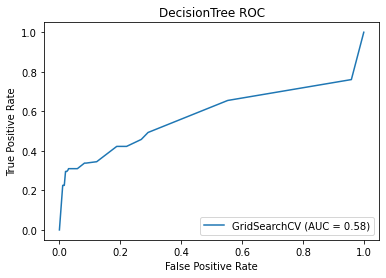

In [10]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [11]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.2798841341135907
KS:  0.27988413411359075
threshold optimo:  0.025
sensibility:  0.30985915492957744
specificity:  0.9700249791840133
precision:  0.13253012048192772
negative predictive value:  0.9895943937141644
Critical Success Index:  0.10232558139534884
accuracy:  0.9604102564102565
f1score:  0.18565400843881857
BalancedAccuracy:  0.6399420670567953


TARGET,0,1
pred,,
0,9320,98
1,288,44


*K-NEAREST NEIGHBOR*

In [12]:
pipeline_bm.modelacion('K-Nearest Neighbor', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.650, total= 4.0min
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.646, total= 4.0min
[CV] algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.9min remaining:    0.0s


[CV]  algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=3, p=2, weights=distance, score=0.668, total= 4.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.9min finished


best params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
best estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
ROC: 0.6529527916876781
Modelación: OK.
________________________________________________________________________________________________________________________


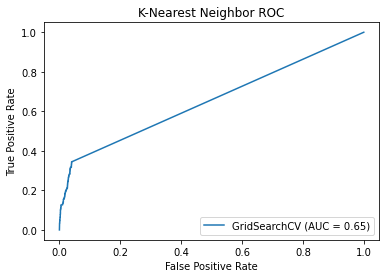

In [13]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [14]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.3049996481805068
KS:  0.30499964818050684
threshold optimo:  0.281
sensibility:  0.34507042253521125
specificity:  0.9599292256452956
precision:  0.11290322580645161
negative predictive value:  0.9900171747531129
Critical Success Index:  0.09297912713472485
accuracy:  0.950974358974359
f1score:  0.1701388888888889
BalancedAccuracy:  0.6524998240902534


TARGET,0,1
pred,,
0,9223,93
1,385,49


*SUPPORT VECTOR MACHINE*

In [15]:
pipeline_bm.modelacion('SVC', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=1, class_weight=balanced, gamma=scale, kernel=rbf, probability=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, class_weight=balanced, gamma=scale, kernel=rbf, probability=True, score=0.747, total=12.4min
[CV] C=1, class_weight=balanced, gamma=scale, kernel=rbf, probability=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.4min remaining:    0.0s


[CV]  C=1, class_weight=balanced, gamma=scale, kernel=rbf, probability=True, score=0.767, total=11.7min
[CV] C=1, class_weight=balanced, gamma=scale, kernel=rbf, probability=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 24.0min remaining:    0.0s


[CV]  C=1, class_weight=balanced, gamma=scale, kernel=rbf, probability=True, score=0.751, total=12.2min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 36.2min finished


best params: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
best estimator: SVC(C=1, class_weight='balanced', probability=True)
ROC: 0.7358202085116863
Modelación: OK.
________________________________________________________________________________________________________________________


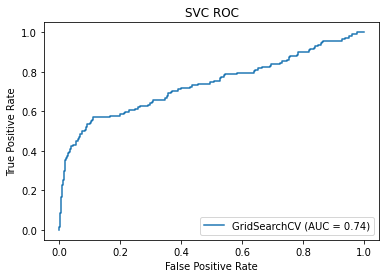

In [16]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [17]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.4581202870847063
KS:  0.4581202870847064
threshold optimo:  0.028
sensibility:  0.5704225352112676
specificity:  0.8876977518734388
precision:  0.06982758620689655
negative predictive value:  0.9928987194412107
Critical Success Index:  0.06633906633906633
accuracy:  0.8830769230769231
f1score:  0.12442396313364056
BalancedAccuracy:  0.7290601435423532


TARGET,0,1
pred,,
0,8529,61
1,1079,81


*BAGGING CLASSIFIER*

In [ ]:
pipeline_bm.modelacion('Bagging Classifier', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

In [ ]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [ ]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

*GRADIENT BOOSTING CLASSIFIER*

In [18]:
pipeline_bm.modelacion('Gradient Boosting Classifier', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=100, random_state=0 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... n_estimators=100, random_state=0, score=0.764, total=  38.8s
[CV] n_estimators=100, random_state=0 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.7s remaining:    0.0s


[CV] .... n_estimators=100, random_state=0, score=0.783, total=  38.5s
[CV] n_estimators=100, random_state=0 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV] .... n_estimators=100, random_state=0, score=0.749, total=  38.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min finished


best params: {'n_estimators': 100, 'random_state': 0}
best estimator: GradientBoostingClassifier(random_state=0)
ROC: 0.7784424071489721
Modelación: OK.
________________________________________________________________________________________________________________________


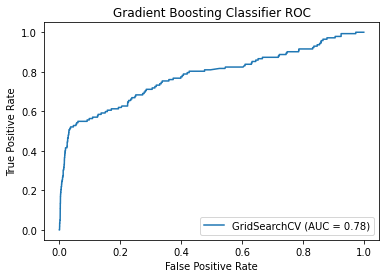

In [19]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [20]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.4872641343481372
KS:  0.4872641343481372
threshold optimo:  0.015
sensibility:  0.5492957746478874
specificity:  0.9379683597002498
precision:  0.11572700296735905
negative predictive value:  0.9929484354341119
Critical Success Index:  0.10569105691056911
accuracy:  0.9323076923076923
f1score:  0.1911764705882353
BalancedAccuracy:  0.7436320671740686


TARGET,0,1
pred,,
0,9012,64
1,596,78


*EXTRA TREES CLASSIFIER*

In [21]:
pipeline_bm.modelacion('Extra Trees Classifier', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class_weight=balanced, criterion=gini, n_estimators=1000, n_jobs=8, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=balanced, criterion=gini, n_estimators=1000, n_jobs=8, random_state=0, score=0.761, total=  38.2s
[CV] class_weight=balanced, criterion=gini, n_estimators=1000, n_jobs=8, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, n_estimators=1000, n_jobs=8, random_state=0, score=0.726, total=  34.5s
[CV] class_weight=balanced, criterion=gini, n_estimators=1000, n_jobs=8, random_state=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  class_weight=balanced, criterion=gini, n_estimators=1000, n_jobs=8, random_state=0, score=0.744, total=  34.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min finished


best params: {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 1000, 'n_jobs': 8, 'random_state': 0}
best estimator: ExtraTreesClassifier(class_weight='balanced', n_estimators=1000, n_jobs=8,
                     random_state=0)
ROC: 0.7522069343622099
Modelación: OK.
________________________________________________________________________________________________________________________


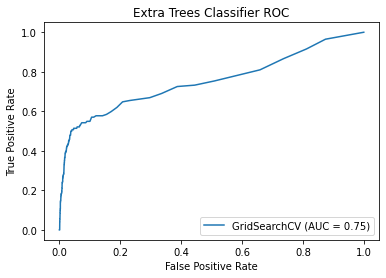

In [22]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [23]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.4689812480210154
KS:  0.4689812480210154
threshold optimo:  0.028
sensibility:  0.5422535211267606
specificity:  0.9267277268942548
precision:  0.09859154929577464
negative predictive value:  0.9927528152525366
Critical Success Index:  0.09101654846335698
accuracy:  0.9211282051282051
f1score:  0.16684723726977246
BalancedAccuracy:  0.7344906240105077


TARGET,0,1
pred,,
0,8904,65
1,704,77


*ADABOOST*

In [24]:
pipeline_bm.modelacion('AdaBoost', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=100, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=100, random_state=0, score=0.766, total=  28.3s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=100, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s remaining:    0.0s


[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=100, random_state=0, score=0.766, total=  28.3s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=100, random_state=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.5s remaining:    0.0s


[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=100, random_state=0, score=0.721, total=  28.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


best params: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100, 'random_state': 0}
best estimator: AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)
ROC: 0.6914103270748555
Modelación: OK.
________________________________________________________________________________________________________________________


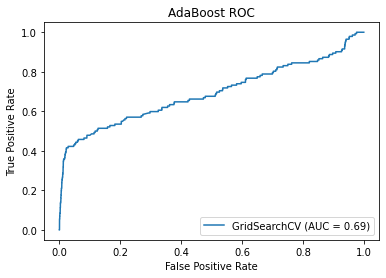

In [25]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [26]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.3904785917838423
KS:  0.39047859178384214
threshold optimo:  0.493
sensibility:  0.4225352112676056
specificity:  0.9679433805162365
precision:  0.16304347826086957
negative predictive value:  0.9912598593050522
Critical Success Index:  0.13333333333333333
accuracy:  0.96
f1score:  0.23529411764705885
BalancedAccuracy:  0.6952392958919211


TARGET,0,1
pred,,
0,9300,82
1,308,60


*MLP CLASSIFIER*

In [27]:
pipeline_bm.modelacion('MLPClassifier', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] activation=logistic, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(500, 100), learning_rate=constant, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=0, solver=sgd, tol=0.0001, validation_fraction=0.1, warm_start=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(500, 100), learning_rate=constant, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=0, solver=sgd, tol=0.0001, validation_fraction=0.1, warm_start=False, score=0.692, total=  45.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(500, 100), learning_rate=constant, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=0, solver=sgd, tol=0.0001, validation_fraction=0.1, warm_start=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.4s remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(500, 100), learning_rate=constant, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=0, solver=sgd, tol=0.0001, validation_fraction=0.1, warm_start=False, score=0.674, total=  46.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(500, 100), learning_rate=constant, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=0, solver=sgd, tol=0.0001, validation_fraction=0.1, warm_start=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, batch_size=auto, beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(500, 100), learning_rate=constant, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=0, solver=sgd, tol=0.0001, validation_fraction=0.1, warm_start=False, score=0.679, total=  47.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished


best params: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (500, 100), 'learning_rate': 'constant', 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}
best estimator: MLPClassifier(activation='logistic', hidden_layer_sizes=(500, 100),
              random_state=0, solver='sgd')
ROC: 0.7134525512776912
Modelación: OK.
________________________________________________________________________________________________________________________


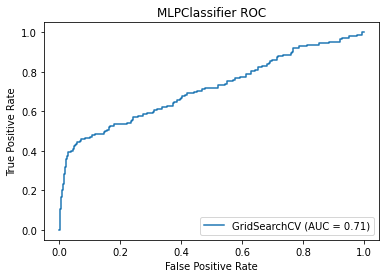

In [28]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [29]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.1580724982702209
KS:  0.15807249827022085
threshold optimo:  0.017
sensibility:  0.8591549295774648
specificity:  0.29891756869275604
precision:  0.01778944298629338
negative predictive value:  0.9930843706777317
Critical Success Index:  0.017737714451875546
accuracy:  0.3070769230769231
f1score:  0.03485714285714286
BalancedAccuracy:  0.5790362491351104


TARGET,0,1
pred,,
0,2872,20
1,6736,122


*RANDOM FOREST*

In [7]:
pipeline_bm.separa_muestras()
pipeline_bm.modelacion('RandomForest', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Separacion de muestras: OK.
________________________________________________________________________________________________________________________
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] bootstrap=True, class_weight=None, criterion=gini, n_estimators=100, n_jobs=-1, oob_score=True, random_state=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, class_weight=None, criterion=gini, n_estimators=100, n_jobs=-1, oob_score=True, random_state=0, score=0.781, total=  22.8s
[CV] bootstrap=True, class_weight=None, criterion=gini, n_estimators=100, n_jobs=-1, oob_score=True, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.7s remaining:    0.0s


[CV]  bootstrap=True, class_weight=None, criterion=gini, n_estimators=100, n_jobs=-1, oob_score=True, random_state=0, score=0.784, total=  19.0s
[CV] bootstrap=True, class_weight=None, criterion=gini, n_estimators=100, n_jobs=-1, oob_score=True, random_state=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.8s remaining:    0.0s


[CV]  bootstrap=True, class_weight=None, criterion=gini, n_estimators=100, n_jobs=-1, oob_score=True, random_state=0, score=0.787, total=  19.0s
[CV] bootstrap=True, class_weight=None, criterion=gini, n_estimators=500, n_jobs=-1, oob_score=True, random_state=0 
[CV]  bootstrap=True, class_weight=None, criterion=gini, n_estimators=500, n_jobs=-1, oob_score=True, random_state=0, score=0.786, total= 1.5min
[CV] bootstrap=True, class_weight=None, criterion=gini, n_estimators=500, n_jobs=-1, oob_score=True, random_state=0 
[CV]  bootstrap=True, class_weight=None, criterion=gini, n_estimators=500, n_jobs=-1, oob_score=True, random_state=0, score=0.791, total= 1.6min
[CV] bootstrap=True, class_weight=None, criterion=gini, n_estimators=500, n_jobs=-1, oob_score=True, random_state=0 
[CV]  bootstrap=True, class_weight=None, criterion=gini, n_estimators=500, n_jobs=-1, oob_score=True, random_state=0, score=0.792, total= 1.7min
[CV] bootstrap=True, class_weight=None, criterion=entropy, n_estimato

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 11.7min finished


best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'n_estimators': 500, 'n_jobs': -1, 'oob_score': True, 'random_state': 0}
best estimator: RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=0)
ROC: 0.7921916909325564
Modelación: OK.
________________________________________________________________________________________________________________________


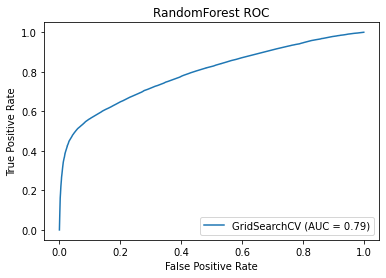

In [8]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [9]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

"ROC OPTIMO"

sens+espc:  1.4634164276406008
KS:  0.46341642764060076
threshold optimo:  0.523
sensibility:  0.5595881333469263
specificity:  0.9038282942936745
precision:  0.8548512692726989
negative predictive value:  0.6696995183117975
Critical Success Index:  0.5110324923191509
accuracy:  0.7306666666666667
f1score:  0.6764017252002464
BalancedAccuracy:  0.7317082138203004


TARGET,0,1
pred,,
0,17518,8640
1,1864,10978


*XGBOOST*

In [33]:
pipeline_bm.separa_muestras()
pipeline_bm.modelacion('XGBoost', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')

Separacion de muestras: OK.
________________________________________________________________________________________________________________________
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[01:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.737, total=  50.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.0s remaining:    0.0s


[01:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.779, total=  49.7s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[01:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.753, total=  49.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min finished


[01:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


best params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
best estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_dept

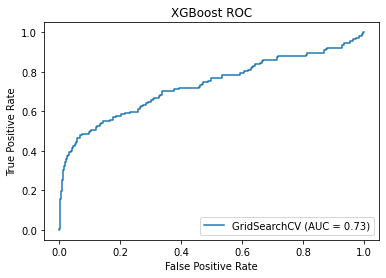

In [34]:
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [35]:
pipeline_bm.metricas_modelo_optimo()
pipeline_bm.confusion_matrix

       "ROC OPTIMO"

sens+espc:  1.4113942606513352
KS:  0.4113942606513352
threshold optimo:  0.02
sensibility:  0.4859154929577465
specificity:  0.9254787676935887
precision:  0.08789808917197452
negative predictive value:  0.9918572225320692
Critical Success Index:  0.08041958041958042
accuracy:  0.9190769230769231
f1score:  0.14886731391585759
BalancedAccuracy:  0.7056971303256676


TARGET,0,1
pred,,
0,8892,73
1,716,69


# **FEATURE IMPORTANCE** 
*Al momento de entrenar el random forest se genera el feature importance, aca se listan las variables y respectivos importancias*

In [10]:
n_variables=30
pipeline_bm.rf_feature_importance.head(n_variables)

,variable,f_importance
413,COMUNA,0.030337
409,MACRO_GRAL,0.022161
404,EDAD,0.020820
375,TICKET_AA_UAM,0.020120
410,MACRO_BYCP,0.019950
403,GSE,0.019495
411,MACRO_FARMA,0.018164
67,MONTO_AA_6UM,0.016295
66,MONTO_AA_UAM,0.015915
381,DCTO_PCT_AA_UAM,0.014181


In [2]:
#features=list(pipeline_bm.rf_feature_importance.variable.head(n_variables).values)
#features=['COMUNA','MACRO_GRAL','EDAD','TICKET_AA_UAM','MACRO_BYCP','GSE','MACRO_FARMA','MESES_INSCRITOS','GENERO','MACRO_WELLNESS','TICKET_CV_UAM','PROD_TRX_FARMA_UAM','PIRAMIDE','PROD_TRX_CV_UAM','TICKET_FARMA_UAM']
#features=['COMUNA','MACRO_GRAL','EDAD','TICKET_AA_UAM','MACRO_BYCP','GSE','MACRO_FARMA','MESES_INSCRITOS','GENERO','MACRO_WELLNESS']
#features=['COMUNA','MACRO_GRAL','EDAD','TICKET_AA_UAM','MACRO_BYCP','GSE']
#features=['COMUNA','MACRO_GRAL','EDAD','TICKET_AA_UAM']
features=['COMUNA','MACRO_GRAL','EDAD','TICKET_AA_UAM','GSE','PIRAMIDE']
features2=[]
features2 = features2+[col for col in features if 'DCTO' not in col] #Excluye las features de DCTO dado que generan problemas por tipo de datos

*en este punto se acotan las variables por importancia y se vuelve a cargar y preprocesar el dataset con este subconjunto de variables. Luego de todo este proceso se estudió correlación entre variables y finalmente se seleccionó un subconjunto de variables no correlacionadas*

In [3]:
query = 'SELECT RUT_CLIENTE,'
for i in features2:
    query = query + i + ','
query = query + 'TARGET FROM AA_MODELAR_2022_V2'
query

'SELECT RUT_CLIENTE,COMUNA,MACRO_GRAL,EDAD,TICKET_AA_UAM,GSE,PIRAMIDE,TARGET FROM AA_MODELAR_2022_V2'

In [4]:
categoricas2=[]
for i in ['GENERO','GSE','PIRAMIDE','ACTIVIDAD','MACRO_GRAL','MACRO_BYCP','MACRO_FARMA','MACRO_WELLNESS','COMUNA','MES']:
    categoricas2 = categoricas2+[col for col in features2 if i in col] # Se genera lista de las variables categoricas contenidas en el listado de features
categoricas2 = list(filter(lambda categoria: categoria not in ('MESES_INSCRITOS'), categoricas2))
categoricas2

['GSE', 'PIRAMIDE', 'MACRO_GRAL', 'COMUNA']

In [5]:
pipeline_bm.recibe_data(
    tipo = 'query',
    server = 'ORACLE',
    dataset_o_query = query,
    target = 'TARGET', 
    #muestra = 'MUESTRA',
    #ano_mes = 'FECHA_VENTA',
    rut = 'RUT_CLIENTE', 
    excluir=[],
    categoricas = categoricas2
)

Procesando...
________________________________________________________________________________________________________________________
Datos recibidos: OK.
Número de filas y columnas del dataset: (130000, 8)
________________________________________________________________________________________________________________________


In [6]:
pipeline_bm.inicializar()
pipeline_bm.imputacion_nulos(imputar_0=['MONTO','FREQ','TRX','PROD_DIS','DSCTO','DCTO','NVISITAS','RECENCIA','NPROD','TICKET','PROP','MESES_INSCRITOS'])
#pipeline_bm.categoriza_continuas_nulos(corte_nulos=0.05, cuantiles_inicio=5)
#pipeline_bm.imputacion_nulos(estadistico_o_metodo='knn', n_vecinos=5)
pipeline_bm.Woeizar2(ruta_exporta='D:/SOCOFAR/Modelo_AA/clf_woe_aa.joblib')
#pipeline_bm.aplicar_log()
#pipeline_bm.feature_scaling(metodo='estandar')
#pipeline_bm.dumifica(botar_primera_col=True)

Variables fueron imputadas por medias: OK.
________________________________________________________________________________________________________________________
Woeizado de Variables: OK.
________________________________________________________________________________________________________________________


*luego se reejecuta el modelo seleccionado para modelar, solo utilizando el subconjunto de variables que proporciona el mejor trade-off entre "n" de variables y performance*

Separacion de muestras: OK.
________________________________________________________________________________________________________________________
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.651, total=   0.3s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.652, total=   0.2s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=saga, score=0.660, total=   0.2s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=lbfgs 
[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=lbfgs, score=0.651, total=   1.1s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=lbfgs 
[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=lbfgs, score=0.652, total=   0.1s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=lbfgs 
[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=lbfgs, score=0.660, total=   0.1s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=sag 
[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=sag, score=0.651, total=   0.2s
[CV] C=0.1, class_weight=None, penalty=l2, random_state=0, solver=sag 
[CV]  C=0.1, class_weight=None, penalty=l2, random_state=0, solver=sag, score=0.652, total=   0.2s
[CV] C=0.1, class_weight=None, penalty

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:   18.6s finished


best params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}
best estimator: LogisticRegression(C=10, class_weight='balanced', random_state=0, solver='saga')
ROC: 0.7784442250029951
Modelación: OK.
________________________________________________________________________________________________________________________


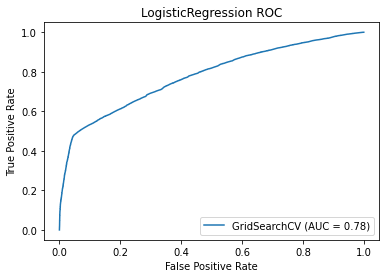

In [7]:
pipeline_bm.separa_muestras(test=0.3)
pipeline_bm.modelacion('LogisticRegression', perf_eval='f1',ruta_exporta='D:/SOCOFAR/Modelo_AA/modelo_aa.joblib')
%matplotlib inline
plot_roc_curve(pipeline_bm.model, pipeline_bm.X_test, pipeline_bm.Y_test)
plt.title(pipeline_bm.algoritmo + ' ROC')
plt.show()

In [12]:
pipeline_bm.metricas_modelo_optimo(metrica='f1')
pipeline_bm.confusion_matrix

"F1 OPTIMO"

sens+espc:  0.7099170697995854
KS:  0.3089608256950348
threshold optimo:  0.33
sensibility:  0.8378020185543888
specificity:  0.47115880714064595
precision:  0.6159034699842614
negative predictive value:  0.741594932597044
Critical Success Index:  0.550287933574394
accuracy:  0.6555897435897435
f1score:  0.7099170697995854
BalancedAccuracy:  0.6544804128475175


TARGET,0,1
pred,,
0,9132,3182
1,10250,16436


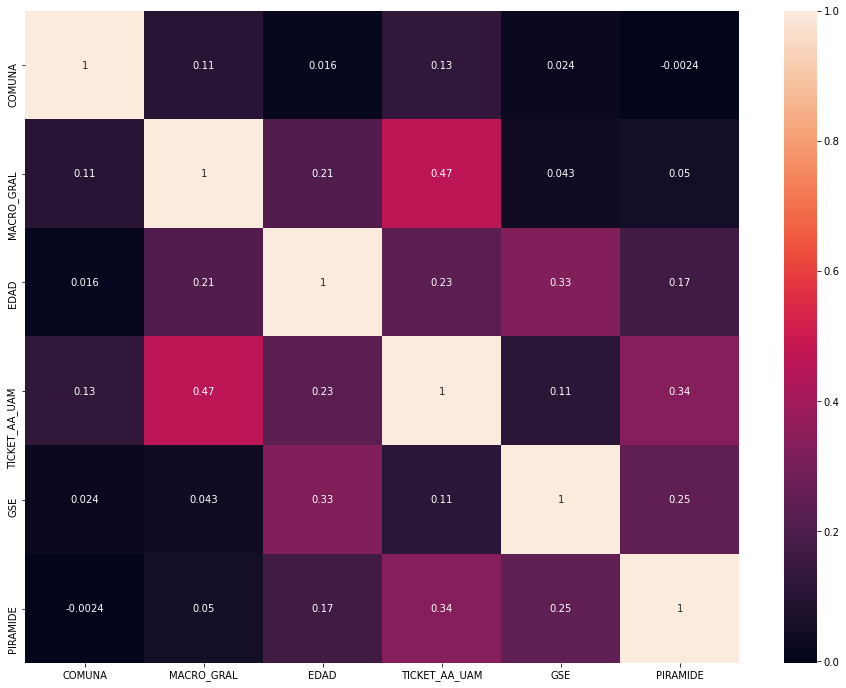

In [57]:
import seaborn as sns
corr_df = pipeline_bm.dataset[features2].corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

# **------------------------------------ PRODUCTIVO ------------------------------------**

In [59]:
features2=['COMUNA','MACRO_GRAL','EDAD','TICKET_AA_UAM','GSE','PIRAMIDE']
categoricas2=['GSE','PIRAMIDE','MACRO_GRAL','COMUNA']

In [60]:
query = 'SELECT RUT_CLIENTE,'
cont=1
for i in features2:
    if cont < len(features2):
        query = query + i + ','
    else:
        query = query + i + ' '
    cont+=1
query = query + 'FROM SCORING_2022'
query

'SELECT RUT_CLIENTE,COMUNA,MACRO_GRAL,EDAD,TICKET_AA_UAM,GSE,PIRAMIDE FROM SCORING_2022'

In [61]:
pipeline_bm = pipeline.clase_pipeline()
pipeline_bm.model = load('modelo_aa.joblib') 
pred_modelo_aa=pd.DataFrame({'RUT_CLIENTE':[],'PROBABILIDAD':[]})

n_df_aa= pipeline.extraer_data('SELECT count(*) FROM SCORING_2022','ORACLE')
step=200000
for i in range(step,n_df_aa['COUNT(*)'][0]+step,step): # saltos de millon en millón hasta llegar al total de registros, esto se realiza para evitar error por espacio/memoria
        query2=query + ' WHERE RN between ' + str(i-step)+' AND '+str(i) 

        pipeline_bm.recibe_data(
                tipo = 'query',
                server = 'ORACLE',
                dataset_o_query = query2,
                #target = 'TARGET', 
                #muestra = 'MUESTRA',
                #ano_mes = 'FECHA_VENTA',
                rut = 'RUT_CLIENTE', 
                excluir=[],
                categoricas =categoricas2
        )

        pipeline_bm.inicializar()
        pipeline_bm.imputacion_nulos(imputar_0=['MONTO','FREQ','TRX','PROD_DIS','DSCTO','DCTO','NVISITAS','RECENCIA','NPROD','TICKET','PROP','MESES_INSCRITOS'])
        pipeline_bm.rangos_continuas(ruta_df_woes='D:/SOCOFAR/Modelo_aa/clf_woe_aa.joblib')
        pipeline_bm.Woeizar2(ruta_exporta='D:/SOCOFAR/Modelo_aa/clf_woe_aa.joblib')

        pred_prob_model=pipeline_bm.model.predict_proba(pipeline_bm.dataset[[i for i in pipeline_bm.dataset.columns if i not in (pipeline_bm.no_considerar)]])[:,1]
        pred_modelo_aa = pd.concat([pred_modelo_aa,pd.DataFrame({'RUT_CLIENTE': np.array(pipeline_bm.dataset['RUT_CLIENTE']), 'PROBABILIDAD': pred_prob_model})])

Procesando...
________________________________________________________________________________________________________________________
Datos recibidos: OK.
Número de filas y columnas del dataset: (200000, 7)
________________________________________________________________________________________________________________________
Variables fueron imputadas por medias: OK.
________________________________________________________________________________________________________________________
Woeizado de Variables: OK.
________________________________________________________________________________________________________________________
Procesando...
________________________________________________________________________________________________________________________
Datos recibidos: OK.
Número de filas y columnas del dataset: (200001, 7)
________________________________________________________________________________________________________________________
Variables fueron imputadas por

In [62]:
pred_modelo_aa.to_csv('SCORING_AA_JUL22.csv')

In [63]:
pipeline_bm.model.best_estimator_.coef_

array([[ 0.70904395,  0.4324965 ,  0.70828827,  0.83829003, -0.84723388,
         0.22515701]])

In [64]:
pipeline_bm.model.best_estimator_.intercept_

array([0.01511304])

In [ ]:
pipeline_bm = pipeline.clase_pipeline()
clf = load('D:/SOCOFAR/Modelo_aa/clf_woe_aa.joblib')
clf.woe_df